In [47]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import tqdm
import librosa
import scipy
import IPython.display as ipd
import soundfile as sf

In [12]:
def sinusoid(f0, duration, sr):
    t = np.arange(0, duration, 1/sr)
    return np.sin(2 * np.pi * f0 * t)


def generate(f_c, f_m, gamma, bw=2, duration=2, sr=2**14):
    sigma0 = 0.1
    t = np.arange(-duration/2, duration/2, 1/sr)
    chirp_phase = 2*np.pi*f_c / (gamma*np.log(2)) * (2 ** (gamma*t) - 1)
    carrier = np.sin(chirp_phase)
    modulator = np.sin(2 * np.pi * f_m * t)
    window_std = sigma0 * bw / gamma
    window = scipy.signal.gaussian(duration*sr, std=window_std*sr)
    x = carrier * modulator * window
    return x


def generate_audio(f0s, fms, gammas, duration, sr):
    audio = np.zeros((len(f0s), len(fms), len(gammas), duration * sr))
    cmap = np.zeros((3, len(f0s) * len(fms) * len(gammas)))
    c = 0

    print('Generating Audio ...')
    for i, f0 in tqdm.tqdm(enumerate(f0s)):
        for j, fm in enumerate(fms):
            for k, gamma in enumerate(gammas):
                audio[i, j, k, :] = generate(f0, fm, gamma, sr=sr, duration=duration)
                audio[i, j, k, :] = audio[i, j, k, :] / np.linalg.norm(audio[i, j, k, :])
                cmap[0, c], cmap[1, c], cmap[2, c] = f0, fm, gamma
                c += 1
    return audio, cmap

In [22]:
sr=44100
y,cmap = generate_audio([100],[4],[4],1,sr)

1it [00:00, 63.08it/s]

Generating Audio ...


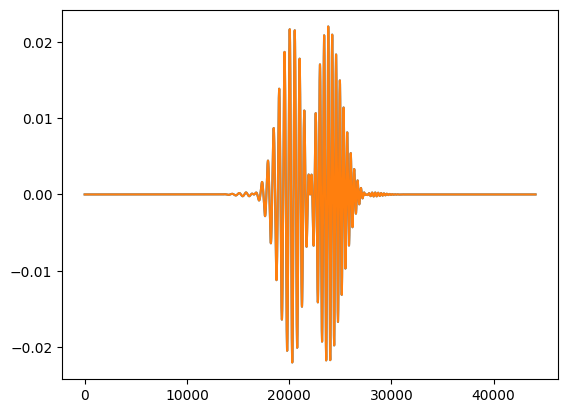

In [19]:
plt.plot(y.squeeze())
plt.show()

In [43]:
y,cmap = generate_audio([2000],[4],[4],1,sr)
display(ipd.Audio(y.squeeze(),rate=sr))
y,cmap = generate_audio([2000],[8],[4],1,sr)
display(ipd.Audio(y.squeeze(),rate=sr))
y,cmap = generate_audio([2000],[4],[8],1,sr)
display(ipd.Audio(y.squeeze(),rate=sr))

1it [00:00, 116.06it/s]

Generating Audio ...


1it [00:00, 15.60it/s]

Generating Audio ...


1it [00:00, 59.18it/s]

Generating Audio ...


1it [00:00, 61.54it/s]

Generating Audio ...


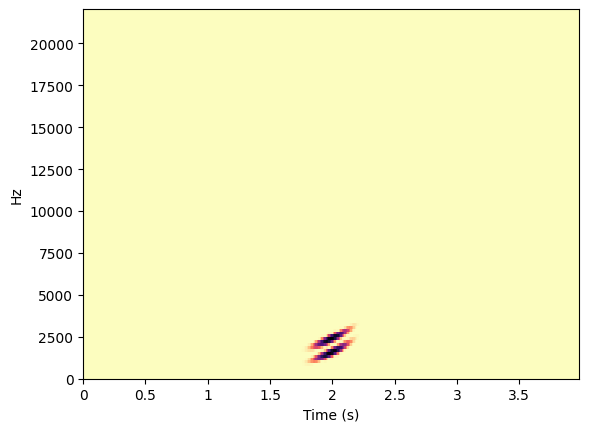

1it [00:00, 225.54it/s]

Generating Audio ...


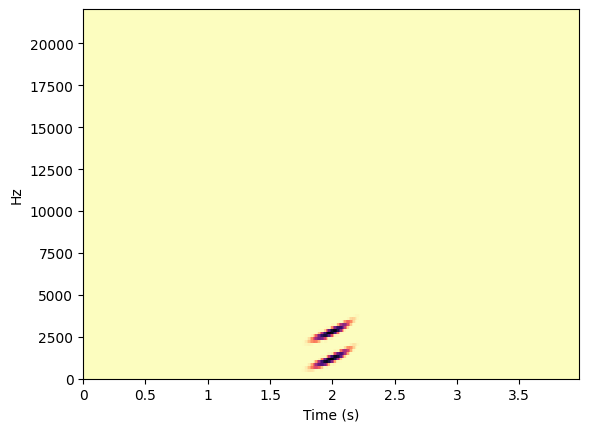

In [36]:
c=1e-8
#f0s, fms, gammas
y,cmap = generate_audio([2000],[400],[10],1,sr)
spec2,_,_,_ = plt.specgram(y.squeeze(),Fs=sr,cmap="magma_r",scale="linear")#,NFFT=218,noverlap=64)
librosa.display.specshow(np.log1p(spec2/c),x_axis='s',sr =sr,
                         y_axis='linear',cmap="magma_r")
plt.show()
y2,cmap = generate_audio([2000],[800],[10],1,sr)
spec3,_,_,_ = plt.specgram(y2.squeeze(),Fs=sr,cmap="magma_r",scale="linear")#,NFFT=218,noverlap=64)
librosa.display.specshow(np.log1p(spec3/c),x_axis='s',sr =sr,
                         y_axis='linear',cmap="magma_r")
plt.show()

In [44]:
def colored_noise(signal):
    N = len(signal)
    phasors = np.exp(2j*np.pi*np.random.rand(N//2-1))
    colored_noise_ft = np.abs(np.fft.fft(signal))+0j
    len_ft = len(colored_noise_ft)
    colored_noise_ft[1:(len_ft//2)] = colored_noise_ft[1:(len_ft//2)]*phasors
    colored_noise_ft[-1:(len_ft-len_ft//2):-1] = colored_noise_ft[-1:(len_ft-len_ft//2):-1]*np.conj(phasors)
    colored_noise = np.fft.ifft(colored_noise_ft)
    return colored_noise

In [48]:
y,sr = sf.read("../audio/fquartet_jan.wav")
ipd.Audio(y,rate=sr)

In [50]:
signal = y
N = len(signal)
phasors = np.exp(2j*np.pi*np.random.rand(N//2-1))
colored_noise_ft = np.abs(np.fft.fft(signal))+0j
len_ft = len(colored_noise_ft)
colored_noise_ft[1:(len_ft//2)] = colored_noise_ft[1:(len_ft//2)]*phasors
colored_noise_ft[-1:(len_ft-len_ft//2):-1] = colored_noise_ft[-1:(len_ft-len_ft//2):-1]*np.conj(phasors)
colored_noise = np.fft.ifft(colored_noise_ft)
y2 = colored_noise
ipd.Audio(y2,rate=sr)

In [59]:
phase = np.random.rand(N//2-1)
max(phase),min(phase)
#np.linspace(0,1,N//2-1)

(0.9999886618934631, 8.749272969454935e-06)

In [62]:
signal = y
N = len(signal)
phasors = np.exp(2j*np.pi*np.linspace(1e-6,1-1e-6,N//2-1))
colored_noise_ft = np.abs(np.fft.fft(signal))+0j
before = colored_noise_ft
len_ft = len(colored_noise_ft)
colored_noise_ft[1:(len_ft//2)] = colored_noise_ft[1:(len_ft//2)]*phasors
colored_noise_ft[-1:(len_ft-len_ft//2):-1] = colored_noise_ft[-1:(len_ft-len_ft//2):-1]*np.conj(phasors)
after = colored_noise_ft
colored_noise = np.fft.ifft(colored_noise_ft)
y2 = colored_noise
ipd.Audio(y2,rate=sr)

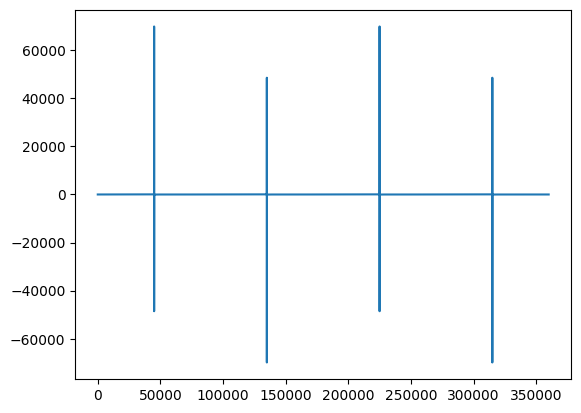

In [70]:
plt.plot(np.imag(before)/np.real(before))
#plt.plot(np.real(after)/np.imag(after))

plt.show()

In [71]:
import random

In [74]:
random.random()

0.036341046632113905

In [ ]:
om = omega[o] + random.random() * (omega[o+1] - omega[o])

#### 

In [83]:
8**3/16**3

0.125

In [86]:
a = np.arange(0,16)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [88]:
a[4],a[-5]

(4, 11)